In [1]:
# Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving markets_cleaned.csv to markets_cleaned.csv


In [6]:
df = pd.read_csv('markets_cleaned.csv')
df.head()

,Unnamed: 0,name,city,county,state,lat,lon,months_open,Bakedgoods,Beans,...,Prepared,Seafood,Soap,Tofu,Trees,Vegetables,WildHarvested,Wine,num_items_sold,state_pop
0,0,Island Market,Key Largo,Monroe,Florida,-80.427218,25.109214,6,1,1,...,1,1,1,0,0,1,0,0,18,19893297.0
1,1,COFFO Harvest Farmers' Market,Florida City,Miami-Dade,Florida,-80.482299,25.449850,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
2,2,COFFO Harvest Farmers' Market,Homestead,Miami-Dade,Florida,-80.483400,25.463500,12,0,0,...,1,0,0,0,1,1,0,0,7,19893297.0
3,3,Verde Gardens Farmers Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,12,0,0,...,1,0,0,0,0,1,0,0,5,19893297.0
4,4,Verde Community Farm and Market,Homestead,Miami-Dade,Florida,-80.395607,25.506727,9,0,0,...,0,0,0,0,0,1,0,0,5,19893297.0


In [7]:
# Drop kolom tidak penting
df.drop(columns=['Unnamed: 0', 'name', 'city', 'county'], inplace=True)

In [8]:
# Cek null
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 state             0
lat               4
lon               4
months_open       0
Bakedgoods        0
Beans             0
Cheese            0
Coffee            0
Crafts            0
Eggs              0
Flowers           0
Fruits            0
Grains            0
Herbs             0
Honey             0
Jams              0
Juices            0
Maple             0
Meat              0
Mushrooms         0
Nursery           0
Nuts              0
PetFood           0
Plants            0
Poultry           0
Prepared          0
Seafood           0
Soap              0
Tofu              0
Trees             0
Vegetables        0
WildHarvested     0
Wine              0
num_items_sold    0
state_pop         0
dtype: int64


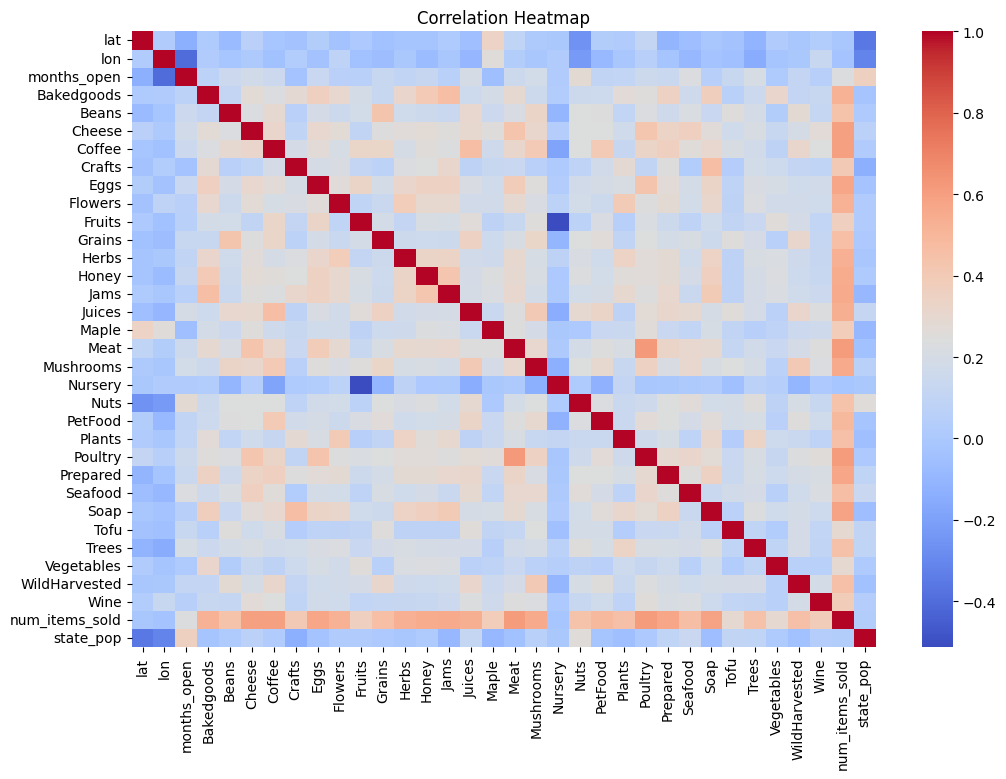

In [9]:
# Korelasi
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

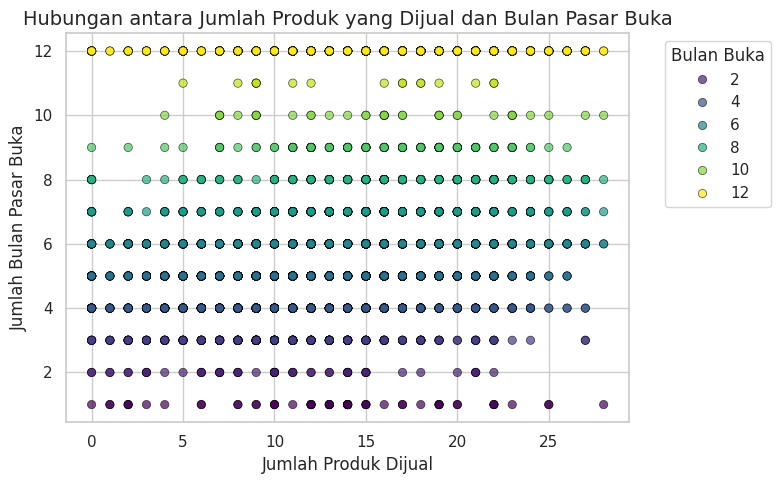

/tmp/ipython-input-3793858546.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.values, y=product_counts.index, palette='crest')


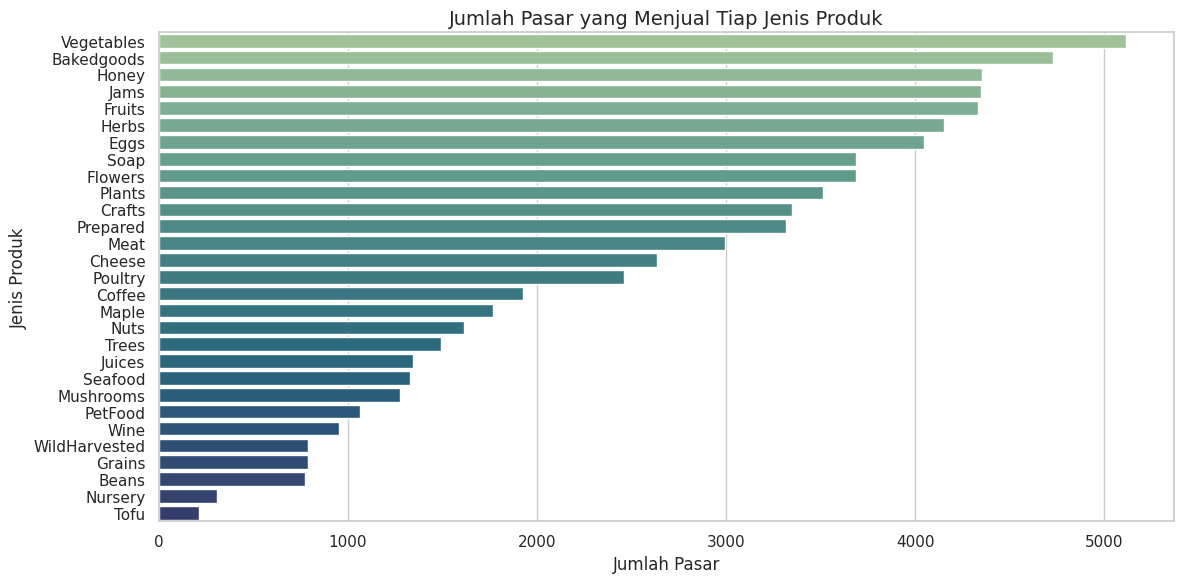

MAE: 1.94
RMSE: 2.60
R² Score: 0.06

INSIGHT:
- Pasar yang menjual lebih banyak produk cenderung buka lebih lama.
- Sayuran, buah-buahan, dan makanan siap saji adalah produk yang paling umum.
- Produk seperti tofu, wine, dan jamur jarang ditemukan.

KESIMPULAN:
Hipotesis awal terbukti sebagian. Meskipun jumlah produk yang dijual mempengaruhi lama buka pasar, ada variabel lain yang mungkin juga berperan seperti lokasi atau populasi.


In [18]:
## 5.3 Scatterplot jumlah produk vs bulan buka
sns.set(style="whitegrid")
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df,
    x='num_items_sold',
    y='months_open',
    hue='months_open',
    palette='viridis',
    alpha=0.7,
    edgecolor='black'
)
plt.title("Hubungan antara Jumlah Produk yang Dijual dan Bulan Pasar Buka", fontsize=14)
plt.xlabel("Jumlah Produk Dijual")
plt.ylabel("Jumlah Bulan Pasar Buka")
plt.legend(title="Bulan Buka", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 5.4 Bar chart produk yang paling banyak dijual
product_columns = [
    'Bakedgoods', 'Beans', 'Cheese', 'Coffee', 'Crafts', 'Eggs', 'Flowers',
    'Fruits', 'Grains', 'Herbs', 'Honey', 'Jams', 'Juices', 'Maple', 'Meat',
    'Mushrooms', 'Nursery', 'Nuts', 'PetFood', 'Plants', 'Poultry',
    'Prepared', 'Seafood', 'Soap', 'Tofu', 'Trees', 'Vegetables',
    'WildHarvested', 'Wine'
]
product_counts = df[product_columns].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=product_counts.values, y=product_counts.index, palette='crest')
plt.title("Jumlah Pasar yang Menjual Tiap Jenis Produk", fontsize=14)
plt.xlabel("Jumlah Pasar")
plt.ylabel("Jenis Produk")
plt.tight_layout()
plt.show()

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 7. INSIGHT & KESIMPULAN
print("\nINSIGHT:")
print("- Pasar yang menjual lebih banyak produk cenderung buka lebih lama.")
print("- Sayuran, buah-buahan, dan makanan siap saji adalah produk yang paling umum.")
print("- Produk seperti tofu, wine, dan jamur jarang ditemukan.")
print("\nKESIMPULAN:")
print("Hipotesis awal terbukti sebagian. Meskipun jumlah produk yang dijual mempengaruhi lama buka pasar, ada variabel lain yang mungkin juga berperan seperti lokasi atau populasi.")


In [11]:
# Model regresi sederhana
X = df[['num_items_sold']]
y = df['months_open']

In [12]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [13]:
# Evaluasi
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

MAE: 1.94, RMSE: 2.60, R²: 0.06


### 📊 Jenis Analisis yang Digunakan
Analisis terhadap dataset `markets_cleaned.csv` mencakup beberapa pendekatan utama:

---

#### 1. 🧾 Analisis Deskriptif (Descriptive Analysis)
Digunakan untuk memahami struktur data dan karakteristik umum dari pasar.

**Contoh kegiatan:**
- Melihat jumlah pasar yang menjual masing-masing jenis produk.
- Menghitung statistik dasar (jumlah, rata-rata, dll).
- Visualisasi bar chart dan distribusi.

🛠️ **Tools yang digunakan:**
- `df.info()`, `df.describe()`, `df.sum()`
- Bar chart dengan `sns.barplot()`

---

#### 2. 🔍 Analisis Eksploratori Data (Exploratory Data Analysis / EDA)
Digunakan untuk menemukan pola, tren, dan hubungan antar variabel.

**Contoh kegiatan:**
- Heatmap korelasi antar fitur numerik.
- Scatterplot hubungan antara jumlah produk dan lama buka pasar.
- Mencari hubungan visual antar fitur.

🛠️ **Tools yang digunakan:**
- `sns.heatmap()`
- `sns.scatterplot()`

---

#### 3. 🤖 Analisis Prediktif (Predictive Analysis)
Menggunakan model regresi untuk memprediksi variabel target `months_open` berdasarkan `num_items_sold`.

**Model yang digunakan:**
- `Linear Regression`

**Evaluasi Model:**
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R² Score (Koefisien Determinasi)

🛠️ **Tools yang digunakan:**
- `LinearRegression` dari `sklearn.linear_model`
- `mean_absolute_error`, `mean_squared_error`, `r2_score`

---

### 🧠 Kesimpulan
> Analisis yang digunakan mencakup pendekatan **deskriptif**, **eksploratif**, dan **prediktif**, untuk menggali wawasan dari data pasar serta membangun dasar model prediksi sederhana.

Jika ingin dikembangkan lebih lanjut, bisa diarahkan ke:
- Clustering pasar berdasarkan jenis produk (*Unsupervised Learning*)
- Klasifikasi jenis pasar berdasarkan lokasi atau karakteristik lainnya
